# PHAS0031:Computational Physics: Week 3: Assessment
## Joshua Giblin-Burnham(SN.:19052055)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

### Introduction:

In this notebook we will be looking at numerical integration and differentiation as ot pertains to the Quantum Harmonic Oscillator (QHO). Foe a QHO we can in general find the energy of any wavefunction $\psi(x)$ using the formula:
$$E_\psi=\frac{\int \psi^\star(x)\widehat{H}\psi(x) dx}{\int \psi^\star(x)\psi(x) dx}$$
where $\widehat{H}$ is the Hamiltonian (with a hat indicating that it is an operator). 

This is the expectation value, $\langle\widehat{H}\rangle$, of our Hamiltonian divided by the integral of the squared modulus, if the wavefunction is correctly normalised, this will be one and can be ignored, giving;
 $$E_\psi=\langle\widehat{H}\rangle_{\psi}= \int \psi^\star(x)\widehat{H}\psi(x) dx $$

For the QHO, we have a Hamiltonian given by:
$$\widehat{H}=\widehat{T}+\widehat{V}=-\frac{1}{2}\frac{d^2}{dx^2}+\frac{1}{2}kx^2, $$
where the two terms are the kinetic and potential contributions to the energy ( we will set k=1 ). 

### Section 1: The wavefunction and its derivative:

First we will create an x array, with $ \Delta x $ spacing, and compute the corresponding wavefunction values; we will take a simple wavefunction given by,
$$\psi(x)=(2\alpha/\pi)^{1/4}e^{-\alpha x^2},$$

Then we will create and pass a function to calculate the second derivative using finite differences, the $\Delta x $ spacing used in the array will act as the finite difference in the differentiation formula. We will set $ \Delta x $ = 0.01, this is chosen as we want a fine grid of points so when differentiating we don't get a course output, the value gives an array 1000 point which ensures a smooth result.($ \Delta x $ = 0.1, produces course output).

In [2]:
# Intiating variables
dx= 0.01
a= -5
b= 5
alpha0 =  1.0

# x and psi array
x0 = np.arange(a, b, dx)
psi0=((2*alpha0/np.pi)**(1/4))*np.exp(-alpha0*x0**2)

 We define a function to impliment the second order centred difference formula, given as:
 $$ f^{\prime\prime}(x)\simeq\frac{f(x+\mathrm{\Delta x})-2f(x)+f(x-\mathrm{\Delta x})}{\mathrm{\Delta}x^2}$$
 
As we are working on an array with $\psi( \Delta x )$ spacing we impliment the formula by rolling the array. After the array is rolled and formula calculated, we must remove first value as the $\psi(x-\Delta x)$ found by rolling by `1` is wrong, when rolling by `1` the last value becomes first, which does not correspond to $\psi(x_0-\Delta x)$. We dont need to remove last value as $\psi(x)\propto x^2$ (i.e. its symmetric), and as the proceeding value after the last would be +5, this has same result as the first, -5 ( i.e. $\psi(-5)=\psi(+5)$).

In [3]:
def d2_psi(psi, dx):
    '''
    Calculates second derivative by rollig array of psi values and centred difference formula
    Inputs:
    psi- Array of psi values of x
    dx-  Differnce in x values '''
    
    p_dpsi= np.roll(psi,-1)
    n_dpsi= np.roll(psi,1)
    # Arrays are rolled to get +/- dx value
    
    d2psi= (p_dpsi[1:len(psi)]-2*psi[1:len(psi)]+n_dpsi[1:len(psi)])/(dx**2)
    psi= psi[1:len(psi)]
    
    return psi, d2psi

In [4]:
# Create psi, dpsi and x array, x and psi array are redefined as doing dpsi we remove the first value 
psi, d2psi= d2_psi(psi0, dx)
x= x0[1:len(psi0)]

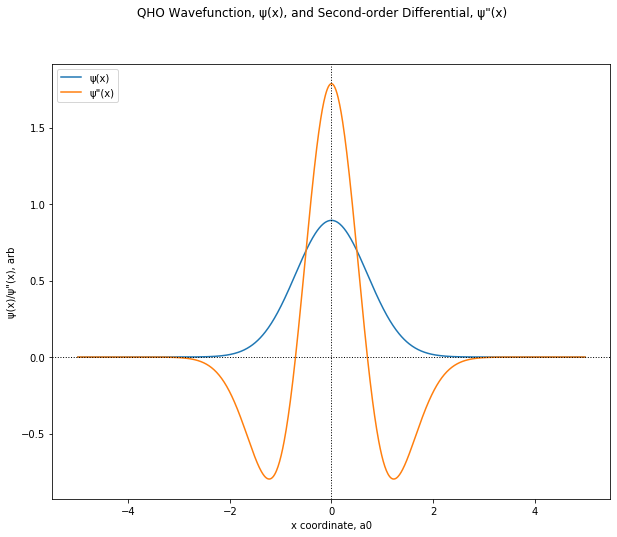

In [5]:
# Plots wave function and derivative
plot1, ax = plt.subplots(1, figsize=(10,8))
plot1.suptitle('QHO Wavefunction, ψ(x), and Second-order Differential, ψ"(x)')

# Plot functions
ax.plot(x, psi, label='ψ(x)')
ax.plot(x, -d2psi, label= 'ψ"(x)')

# Labels, legend and axis
ax.axhline(color='k',ls=':', lw='1')
ax.axvline(color='k',ls=':', lw='1')
ax.legend(loc="upper left")
ax.set(xlabel= 'x coordinate, a0', ylabel= 'ψ(x)/ψ"(x), arb')

plt.show()

### Section 2: Evaluating the energy:

 Next we look to evaluate the kinetic and potential energies using integration on the grid. first we will plot the functions to be integrated. AS said before we are looking at the expectation value of $\widehat{H}$, given by,
$$ \langle\widehat{H}\rangle= \langle\widehat{T}\rangle + \langle\widehat{V}\rangle $$

The individual formula for the expectation value of kinetic and potential energies:

$$ \langle \widehat{T}\rangle_{\psi}= E_{KE}=-\frac{1}{2}\int \psi(x)\frac{d^2\psi}{dx^2} dx$$
 
$$ \langle\widehat{V}\rangle_{\psi}= E_{PE}=\frac{1}{2}k\int \psi(x)x^2\psi(x)\ dx$$
 

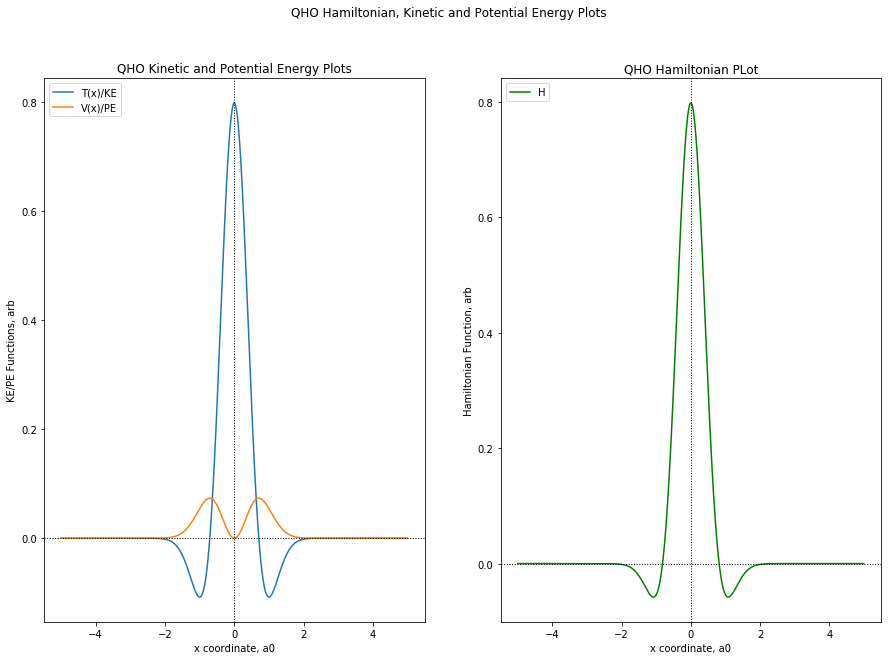

In [6]:
# Creating subplot for Energy functions
plot2, ax = plt.subplots(1, 2, figsize=(15,10))
plot2.suptitle('QHO Hamiltonian, Kinetic and Potential Energy Plots')

# KE and PE subplot- inc labelling, legend and axis
ax[0].plot(x, -0.5*psi*d2psi, label='T(x)/KE')
ax[0].plot(x, 0.5*psi*(x**2)*psi, label= 'V(x)/PE')
ax[0].axhline(color='k', ls=':', lw='1')
ax[0].axvline(color='k', ls=':', lw='1')

ax[0].legend(loc="upper left")
ax[0].set(xlabel= 'x coordinate, a0', ylabel= 'KE/PE Functions, arb')
ax[0].set_title('QHO Kinetic and Potential Energy Plots')

# Hamiltonian Function subplot- inc labelling, legend and axis
ax[1].plot(x, -0.5*psi*d2psi+0.5*psi*(x**2)*psi, 'g', label= 'H')
ax[1].axhline(color='k', ls=':', lw='1')
ax[1].axvline(color='k', ls=':', lw='1')

ax[1].legend(loc="upper left")
ax[1].set(xlabel= 'x coordinate, a0', ylabel= 'Hamiltonian Function, arb')
ax[1].set_title('QHO Hamiltonian PLot')

plt.show()

In [7]:
# Calculate KE using integrate.simps
KE= integrate.simps(-0.5*psi*d2psi, x)

# Calculate PE using integrate.simps
PE= integrate.simps (0.5*psi*(x**2)*psi, x)

# Print results
print(' The calculated Kinetic Energy is,', KE, '.\n The Potential Energy is,', PE,
      '.\n The Hamaltionian Value is, ',KE+PE)

 The calculated Kinetic Energy is, 0.4999875002083115 .
 The Potential Energy is, 0.125 .
 The Hamaltionian Value is,  0.6249875002083115


#### Comments:
We see the kinetic energy dominates over the potential, this agrees with our plots as the potential has a much smaller area comparatively. Next, we look at how this is effected by varying alpha.

### Section 3: Different values of alpha:
Now we look at how $\psi(x)$ and the Hamiltonian/Energy varies as a function of the constant $\alpha$. First, I'll define psi and second derivative as a function with alpha as a variable, for both compactness and makes second plot of integral values easier to evaluate. Then to make an interactive plot, we define a function to plot $\psi(x)$ for given values of  $\alpha$, it also will return the values of the integral.

In [8]:
def psi_x(x,alpha):
    '''Function to calculate psi for given x and alpha value'''
    return ((2*alpha/np.pi)**(1/4))*np.exp(-alpha*x**2)

# for variety this function doesnt use roll; similar equivilent function at end of notebook uses roll
def d2f_x(f, x, alpha, dx):
    ''' Function to calculate second-order differential with centred difference formula;
    Inputs:
    f- Function to differentiate
    x- value/ values of x
    alpha- value of alpha for f(x)
    dx- incremental difference of x '''
    return (f(x+dx, alpha)-2*f(x, alpha)+f(x-dx, alpha))/dx**2

In [12]:
def plot_funct(alpha):
    ''' Plots wave function, differentials and energy functions; and give integral value for given alpha value '''
    
    # Initiating variables, for easy variability
    dx= 0.01
    a= -5
    b= 5
    
    x1= np.arange(a, b, dx)
    d2f= d2f_x(psi_x, x1, alpha, dx)
    f= psi_x(x1, alpha)

    # Creating subplot for Wave function and Energy functions
    plot, ax = plt.subplots(1, 2, figsize=(15,10))
    plot.suptitle('Quantum Harmonic Oscilator Plots')

    # Wave functions subplots- inc axis, labelling, legend and titles
    ax[0].plot(x1, f, label='ψ(x)')
    ax[0].plot(x1, -d2f, label= 'ψ"(x)')
    ax[0].axhline(color='k',ls=':', lw='1')
    ax[0].axvline(color='k',ls=':', lw='1')

    ax[0].legend(loc="upper left")
    ax[0].set(xlabel= 'x coordinate, a0', ylabel= 'ψ(x)/ψ"(x), arb')
    ax[0].set_title('QHO Wavefunction, ψ(x), and Second-order Differential, ψ"(x)')

    # Energy function subplots- inc axis, labelling, legend and titles
    ax[1].plot(x1, -0.5*f*d2f, label='T(x)/KE')
    ax[1].plot(x1, 0.5*f*(x1**2)*f, label= 'V(x)/PE')
    ax[1].axhline(color='k', ls=':', lw='1')
    ax[1].axvline(color='k', ls=':', lw='1')

    ax[1].legend(loc="upper left")
    ax[1].set(xlabel= 'x coordinate, a0', ylabel= 'KE/PE Functions, arb')
    ax[1].set_title('QHO Kinetic and Potential Energy Plots')
    
    plt.show()
    
    # Calculate KE using integrate.simps
    T= integrate.simps(-0.5*f*d2f, x1)
    
    # Calculate PE using integrate.simps
    V= integrate.simps (0.5*f*(x1**2)*f, x1)

    # Print results
    print(' To 3.s.f the calculated Kinetic Energy in atomic units is, {0:.3f} Eh.\n' 
          ' The Potential Energy is, {1:.3f} Eh.\n The Hamaltionian Value is, {2:.3f} Eh'.format(T,V,T+V))

In [10]:
from ipywidgets import interactive
from IPython.display import display

plot3 = interactive(plot_funct, alpha=(0,1.5,0.05))
display(plot3)

interactive(children=(FloatSlider(value=0.75, description='alpha', max=1.5, step=0.05), Output()), _dom_classe…

#### Comment:
We see as $\alpha$ increases from 0.05 to 1.5 the value Kinetic energy increase as the potential energy decrease; this results in the Hamiltonian/ total energy decrease to a minimum at 0.5 before again increasing from 0.5 to 1.5. This agrees with the work on the QHO carried out last week as we saw energy was minimised at a value of  $\alpha=0.5$. To further explore this result, below we will plot the values of these integral for different values of  $\alpha$.

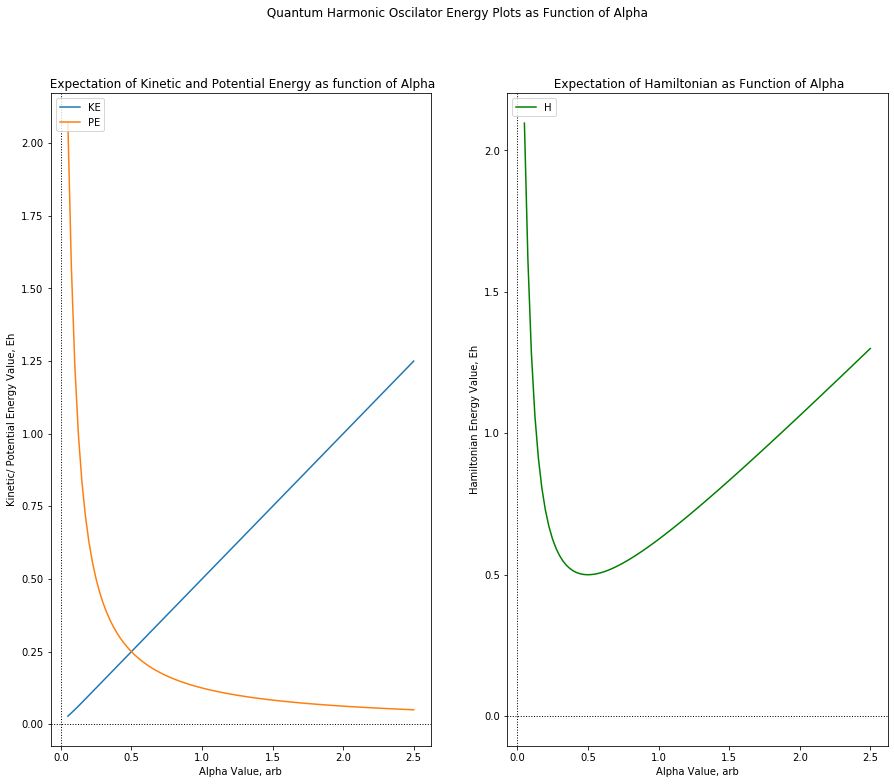

In [13]:
# Initiating variables, for easier variability within cell
dx= 0.01
a= -5
b= 5

# Creates alpha and x array- alpha does go from zero as trival result
alpha_array= np.linspace(0.05, 2.5, 100)
x2= np.arange(a, b, dx)

# Initalising Energy arrays
KE=[]
PE=[]
H=[]

# For alpha values in array computes integrals for potential and kinetic energy
for al in alpha_array:
    t= integrate.simps(-0.5*psi_x(x2, al)*d2f_x(psi_x, x2, al, dx), x2)
    v= integrate.simps (0.5*psi_x(x2, al)*(x2**2)*psi_x(x2, al), x2)
    
    KE.append(t)
    PE.append(v)
    H.append(t+v)
    
# Plots functions again alpha values 
plot4, ax = plt.subplots(1, 2, figsize=(15,12))
plot4.suptitle(' Quantum Harmonic Oscilator Energy Plots as Function of Alpha')

# Kinetic and Potential Energy subplot-  inc axis, labelling, legend and titles
ax[0].plot(alpha_array, KE, label='KE')
ax[0].plot(alpha_array, PE, label= 'PE')
ax[0].axhline(color='k',ls=':', lw='1')
ax[0].axvline(color='k',ls=':', lw='1')

ax[0].legend(loc="upper left")
ax[0].set(xlabel= 'Alpha Value, arb', ylabel= 'Kinetic/ Potential Energy Value, Eh')
ax[0].set_title(' Expectation of Kinetic and Potential Energy as function of Alpha')

# Hamiltonian subplot-  inc axis, labelling, legend and titles
ax[1].plot(alpha_array, H, 'g', label='H')
ax[1].axhline(color='k', ls=':', lw='1')
ax[1].axvline(color='k', ls=':', lw='1')

ax[1].legend(loc="upper left")
ax[1].set(xlabel= 'Alpha Value, arb', ylabel= 'Hamiltonian Energy Value, Eh')
ax[1].set_title(' Expectation of Hamiltonian as Function of Alpha')

plt.show()

#### Comment:
We see these plots confirm that as $\alpha$ increase the value Kinetic energy increase linearly as the potential energy decrease exponentially (technically reciprically); this results in the Hamiltonian/ total energy graph seen in last weeks assignment, with minima at $\alpha=0.5$. The graph is a combination of the kinetic energy's linear dependency and the potential energy's reciprical dependency on alpha. This confirms the accuracy of this numerical analysis.

### Conclusions
 Our analysis of these differentials and integrals has agreed with that done last week, showing energy of this QHO is at minimum when $\alpha = 0.5$. We can note the importance of the spacing of $ \Delta x$ on accuracy of these numerical methods, the finer  $ \Delta x $ the more accurate and less course the result (however, the greater computational power required)

In [ ]:
# alternative differential function
def array_d2f(f, alpha, a, b, dx):
    x= np.arange(a, b, dx)
    f_x= f(x, alpha)
    
    p_df= np.roll(f_x,-1)
    n_df= np.roll(f_x,1)
    
    d2f= (p_df[1:len(f_x)]-2*f_x[1:len(f_x)]+n_df[1:len(f_x)])/(dx**2)
    x= x[1:len(f_x)]    
    
    return x, d2f